## Strip, Swarm, Box, and Violin Plots
- See: https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial
---

In [1]:
import os
import sys

# Import the regular expression module
import re

import numpy as np

import pandas as pd
from scipy.stats import zscore

import matplotlib.pyplot as plt

import seaborn as sns

from IPython.display import display, Markdown

In [2]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Prior size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

Prior size: [6.0, 4.0]
Current size: [12, 9]


In [3]:
# -- -----------------------------------------------------------------
PROJ_ROOT = '../..'

print("------------------------------")
print("          PROJ_ROOT           ")
print(os.path.abspath(PROJ_ROOT))
print("------------------------------")
print(" ")
# -- -----------------------------------------------------------------



# -- -----------------------------------------------------------------
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(PROJ_ROOT, 'src')
sys.path.append(src_dir)


print("------------------------------")
print("           src_dir            ")
print(os.path.abspath(src_dir))
print("------------------------------")
print(" ")
# -- -----------------------------------------------------------------



# -- -----------------------------------------------------------------
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# import my method from the source code
%aimport helper_functions
import helper_functions as hf
# -- -----------------------------------------------------------------

------------------------------
          PROJ_ROOT           
/home/intsights/repos/repos-edu/repos-ds-math-python/data-hero
------------------------------
 
------------------------------
           src_dir            
/home/intsights/repos/repos-edu/repos-ds-math-python/data-hero/src
------------------------------
 


---
### Import Data

In [4]:
auto = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'auto-mpg.csv'    
)


auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,red,27.370336,o
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,green,62.199511,o
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,blue,9.000000,x
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,red,34.515625,o
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,blue,13.298178,s


In [5]:
hp  = auto['hp'].values
mpg = auto['mpg'].values

---
### Constructing strip plots
- Regressions are useful to understand relationships between two ***continuous variables***. 
- Often we want to explore how the distribution of a single ***continuous variable*** is affected by a second ***categorical variable***. 
- Here, `hp` is the ***continuous variable***, and `cyl` is the ***categorical variable***.
- Seaborn provides a variety of plot types to perform these types of comparisons between ***univariate distributions***.

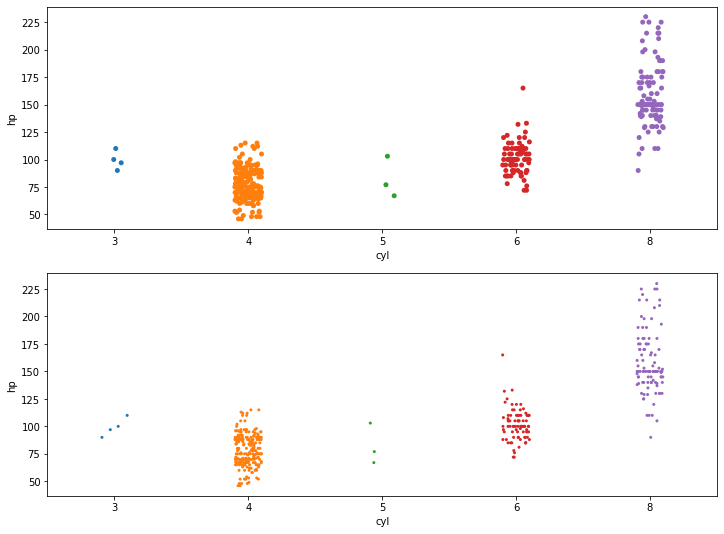

In [6]:
# -- -------------------------------------------------
# Make a strip plot of 'hp' grouped by 'cyl'
plt.subplot(2,1,1)

sns.stripplot(
    x    = 'cyl', 
    y    = 'hp', 
    data = auto
)
# -- -------------------------------------------------


# -- -------------------------------------------------
# Make the strip plot again using jitter and a smaller point size
#
# jitter param: 
#     - amount of jitter (only along the categorical axis) to apply. 
#     - This can be useful when you have many points and they overlap, so that it is easier to see the distribution.

plt.subplot(2,1,2)

sns.stripplot(
    x      = 'cyl', 
    y      = 'hp', 
    data   = auto, 
    size   = 3, 
    jitter = True
)
# -- -------------------------------------------------



plt.show()

#### The strip plot shows that automobiles with more cylinders tend to have higher horsepower.

---
### Constructing swarm plots
- As you have seen, a ***strip plot*** can be visually crowded even with jitter applied and smaller point sizes. 
- An alternative is provided by the ***swarm plot***, which is very similar but spreads out the points to avoid overlap and provides a better visual overview of the data.

/home/intsights/anaconda3/envs/data-hero/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/intsights/anaconda3/envs/data-hero/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/intsights/anaconda3/envs/data-hero/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 29.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/intsights/anaconda3/envs/data-hero/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/

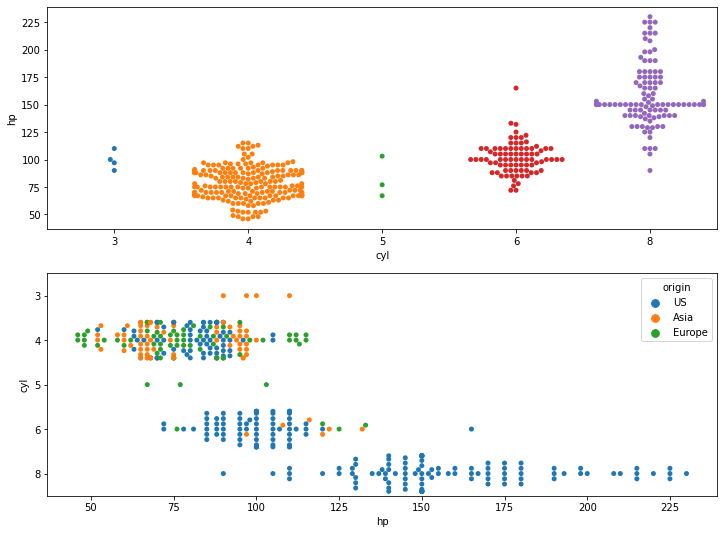

In [7]:
# -- -------------------------------------------------
# Generate a swarm plot of 'hp' grouped horizontally by 'cyl'  
plt.subplot(2,1,1)

sns.swarmplot(
    x    = 'cyl', 
    y    = 'hp', 
    data = auto
)
# -- -------------------------------------------------


# -- -------------------------------------------------
# Generate a swarm plot of 'hp' grouped vertically by 'cyl' with a hue of 'origin'
plt.subplot(2,1,2)

sns.swarmplot(
    x      = 'hp', 
    y      = 'cyl', 
    data   = auto, 
    hue    = 'origin', 
    orient = 'h'
)
# -- -------------------------------------------------



plt.show()

#### Swarm plots are generally easier to understand than strip plots because they spread out the points to avoid overlap.

---

### Box Plots

<img src="images/box-plot.png">

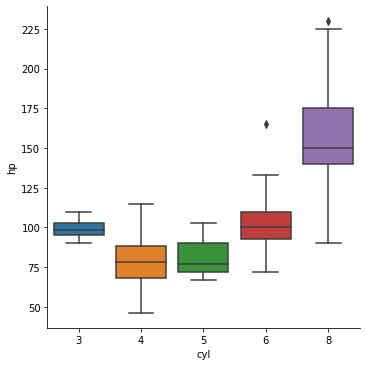

In [8]:
sns.catplot(
    x    = 'cyl', 
    y    = 'hp', 
    kind = 'box', 
    data = auto
)

plt.show()

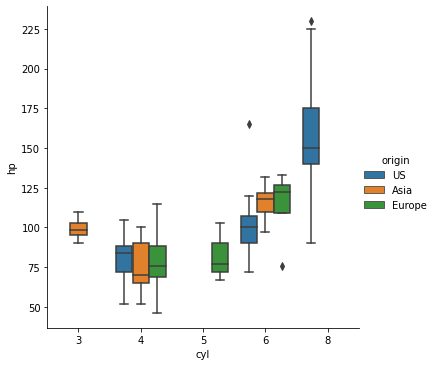

In [9]:
sns.catplot(
    x    = 'cyl', 
    y    = 'hp', 
    hue  = 'origin', 
    kind = 'box', 
    data = auto
)

plt.show()

---
### Constructing violin plots
- Both ***strip*** and ***swarm plots*** visualize ***all*** the datapoints. 
- For large datasets, this can result in significant overplotting. 
- Therefore, it is often useful to use plot types which reduce a dataset to more ***descriptive statistics*** and provide a ***good summary of the data***. 
- ***Box and whisker plots*** are a classic way of summarizing univariate distributions but seaborn provides a more sophisticated extension of the standard box plot, called a ***violin plot***.

---

- Unlike a ***box plot***, in which all of the plot components correspond to actual datapoints, the ***violin plot*** features a kernel density estimation of the underlying distribution.
- This can be an effective and attractive way to show multiple distributions of data at once 
- But keep in mind that the estimation procedure is influenced by the sample size, and violins for relatively small samples might look misleadingly smooth.
- Note, the quartile and whikser values from the ***box plot*** are shown inside the ***violin***.

---

- In general, for ***violin plots*** the "body mass" of the "violin" is a smoothed-out ***histogram*** of that data flipped vertically
- Usually, the "histogram body mass" is mirrored on both sides - hence the violin shape. 
    - But this could be tweaked, for example; one side female - the other male. 

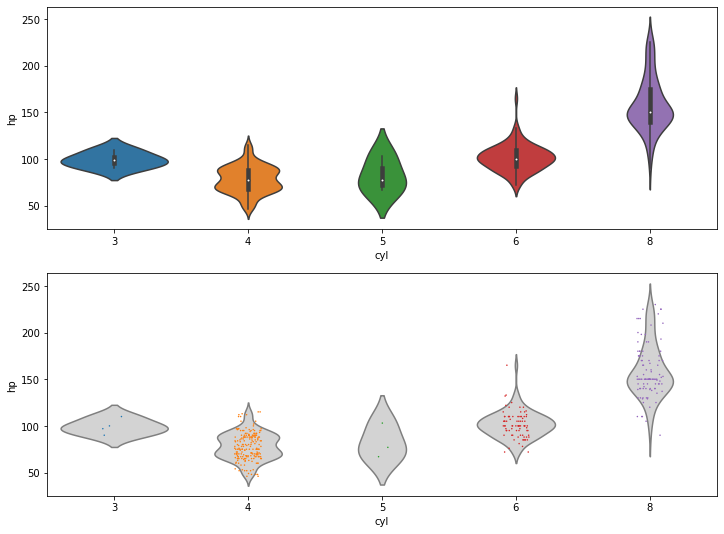

In [10]:
# -- -------------------------------------------------
# Generate a violin plot of 'hp' grouped horizontally by 'cyl'
plt.subplot(2,1,1)

sns.violinplot(
    x    = 'cyl', 
    y    = 'hp', 
    data = auto
)
# -- -------------------------------------------------


# -- -------------------------------------------------
# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
plt.subplot(2,1,2)

sns.violinplot(
    x     = 'cyl', 
    y     = 'hp', 
    data  = auto, 
    inner = None, 
    color = 'lightgray'
)

# --

# Overlay a strip plot on the violin plot
sns.stripplot(
    x      = 'cyl', 
    y      = 'hp', 
    data   = auto, 
    size   = 1.5, 
    jitter = True
)
# -- -------------------------------------------------


plt.show()

---

### More examples with **`hue`** using the **`tips`** dataset

In [11]:
tips = sns.load_dataset("tips")

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


---

#### Without **`hue`**

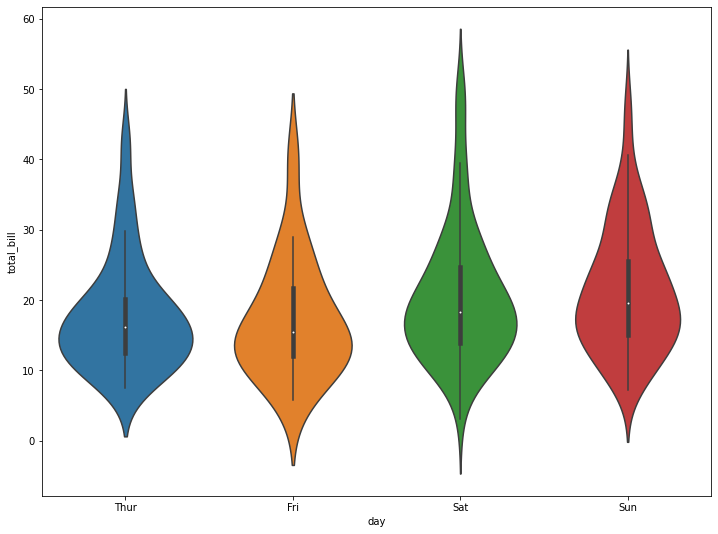

In [13]:
sns.violinplot(
    x    = 'day', 
    y    = 'total_bill', 
    data = tips
)

plt.show()

---

#### With **`hue`**

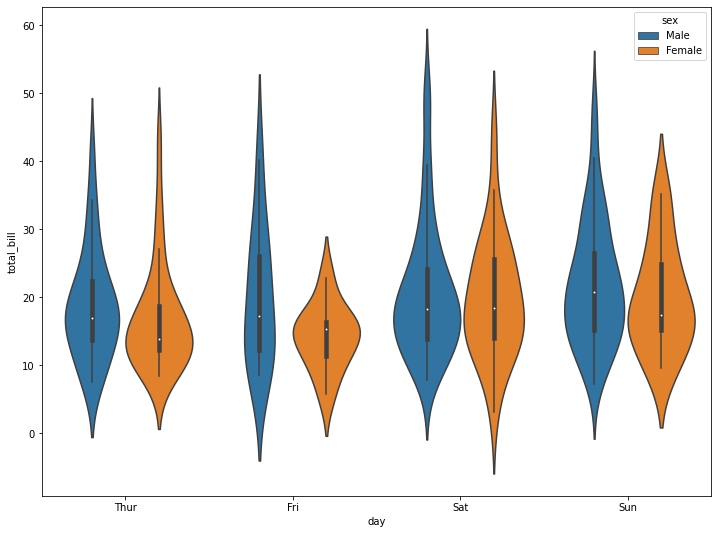

In [14]:
sns.violinplot(
    x    = 'day', 
    y    = 'total_bill', 
    hue  = 'sex',
    data = tips
)

plt.show()

---

#### With **`hue`** and **`split`**

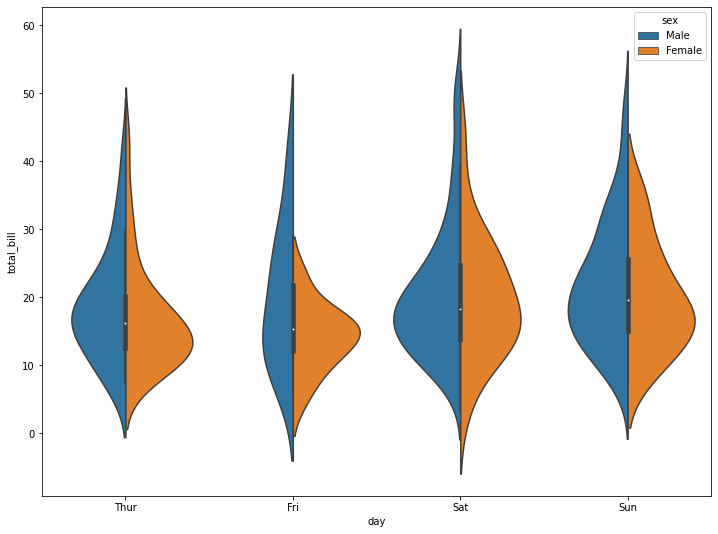

In [15]:
sns.violinplot(
    x     = 'day', 
    y     = 'total_bill', 
    hue   = 'sex',
    split = True,
    data  = tips
)

plt.show()

---

#### With **`hue`** and **`split`** and change inner plot
- Inside show each individual observation instead of the summary boxplot values

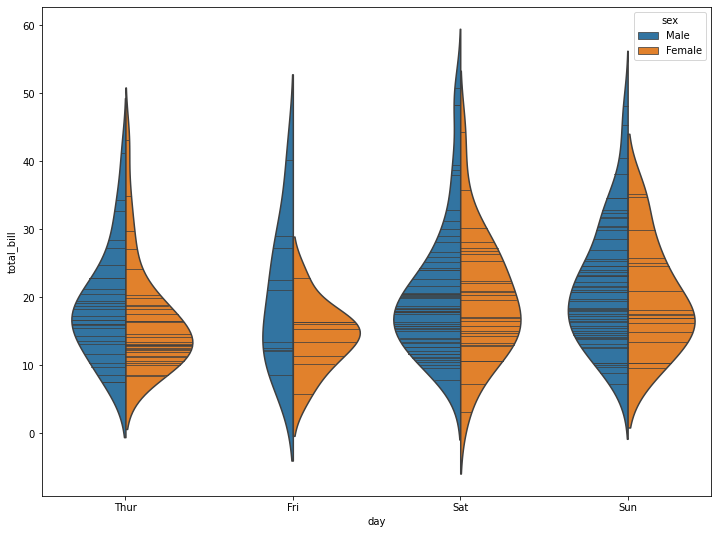

In [16]:
sns.violinplot(
    x     = 'day', 
    y     = 'total_bill', 
    hue   = 'sex',
    inner = 'stick',
    split = True,
    data  = tips
)

plt.show()

---

#### As you can see, violin plots are a nice way of visualizing the relationship between a continuous variable and a categorical variable.